#Notes for Pandas Functions


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
randn = np.random.randn
from pandas import *
# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [6]:
%matplotlib inline


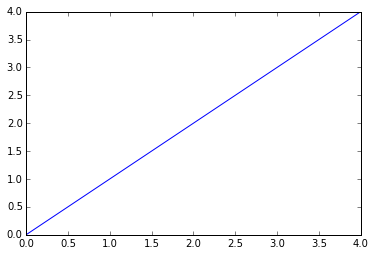

In [7]:
plt.plot(np.arange(5))

In [8]:
#define three main datatype for practise purpose
index = pd.date_range('1/1/2000', periods=8)
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
df = pd.DataFrame(np.random.randn(8, 3), index=index,columns=['A', 'B', 'C'])
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],major_axis=pd.date_range('1/1/2000', periods=5),minor_axis=['A', 'B', 'C', 'D'])


##1. Veiw data (Head and Tail)

In [9]:
df

                   A         B         C
2000-01-01 -1.650804 -0.787431 -0.292166
2000-01-02 -1.686626 -0.294967  0.528312
2000-01-03  0.161181  0.500234  1.278983
2000-01-04  0.184699  0.799544 -0.037615
2000-01-05 -1.244663 -1.197956 -1.606341
2000-01-06  1.317863 -0.456770 -1.121211
2000-01-07  0.455894  0.176352 -0.106461
2000-01-08  0.607797 -1.147063  0.691502

In [10]:
long_series=Series(randn(1000))

In [11]:
long_series.tail(3)

997    1.535327
998    0.056163
999    1.329997
dtype: float64

In [12]:
df[:3]

                   A         B         C
2000-01-01 -1.650804 -0.787431 -0.292166
2000-01-02 -1.686626 -0.294967  0.528312
2000-01-03  0.161181  0.500234  1.278983

## 2.Attributes for Pandas objects:

	• Shape
	• Values
	• Axis labels: 
		○ Series:  index
		○ Dataframe:  index(rows) and columns
		○ Panel:  items, major_axis, and minor_axis


In [13]:
df

                   A         B         C
2000-01-01 -1.650804 -0.787431 -0.292166
2000-01-02 -1.686626 -0.294967  0.528312
2000-01-03  0.161181  0.500234  1.278983
2000-01-04  0.184699  0.799544 -0.037615
2000-01-05 -1.244663 -1.197956 -1.606341
2000-01-06  1.317863 -0.456770 -1.121211
2000-01-07  0.455894  0.176352 -0.106461
2000-01-08  0.607797 -1.147063  0.691502

In [14]:
df.shape

(8, 3)

In [15]:
df.columns=[x.lower()for x in df.columns] 

In [16]:
df

                   a         b         c
2000-01-01 -1.650804 -0.787431 -0.292166
2000-01-02 -1.686626 -0.294967  0.528312
2000-01-03  0.161181  0.500234  1.278983
2000-01-04  0.184699  0.799544 -0.037615
2000-01-05 -1.244663 -1.197956 -1.606341
2000-01-06  1.317863 -0.456770 -1.121211
2000-01-07  0.455894  0.176352 -0.106461
2000-01-08  0.607797 -1.147063  0.691502

In [17]:
s.values

array([-0.01739833,  0.62664556, -0.156368  , -0.89154192,  1.04059295])

In [18]:
df.values # df value contains list of rows in the format of numpy array

array([[-1.65080367, -0.787431  , -0.29216611],
       [-1.68662631, -0.29496705,  0.52831174],
       [ 0.16118122,  0.50023358,  1.27898303],
       [ 0.18469869,  0.79954447, -0.0376154 ],
       [-1.24466305, -1.19795569, -1.60634119],
       [ 1.31786345, -0.45676953, -1.12121069],
       [ 0.455894  ,  0.17635201, -0.10646117],
       [ 0.60779746, -1.14706253,  0.69150193]])

In [19]:
wp.values

array([[[ 1.29858801,  0.02121063, -1.00993319, -0.99636677],
        [ 0.23384054, -1.50112456,  0.7488511 , -0.37108599],
        [ 0.1321173 , -0.38479945,  0.49061217, -0.78108529],
        [-0.70953394, -0.02161157, -0.66983691,  0.41714083],
        [-0.78916603,  0.05645912,  0.05178076,  0.62805307]],

       [[-0.56595815,  0.61148908, -1.09641477,  0.70818855],
        [ 0.39758235, -0.91352988, -1.04591806,  0.03570979],
        [-1.1799241 , -1.79122245, -1.70190583, -1.11084082],
        [-1.2752149 , -1.08914709, -0.46070311,  2.70978549],
        [ 0.64408569, -0.81495031, -1.42536278,  0.8219623 ]]])

##3. Binary operation

DataFrame has the methods add, sub, mul, div and related functions radd, rsub, ... for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the index or columns via the axis keyword:

It specifies the axis along which the means are computed. By default axis=0. This is consistent with the numpy.mean usage when axis is specified explicitly (in numpy.mean, axis==None by default, which computes the mean value over the flattened array) , in which axis=0 along the rows (namely, index in pandas), and axis=1 along the columns.
+------------+---------+--------+
|            |  A      |  B     |
+------------+---------+---------
|      0     | 0.626386| 1.52325|----axis=1----->
+------------+---------+--------+
                |         |
                | axis=0  |
                ↓         ↓

### 3.1 dataframe operation

In [20]:
df=DataFrame(
    {'One':Series(randn(3),index=['a','b','c']),
     'Two':Series(randn(4),index=['a','b','c','d']),
     'Three':Series(randn(3),index=['b','c','d'])}
)

In [21]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [22]:
row=df.ix[1];row

One     -0.495571
Three   -0.461715
Two      0.741734
Name: b, dtype: float64

In [23]:
col=df['Two'];col

a    0.201633
b    0.741734
c    0.531996
d   -0.805263
Name: Two, dtype: float64

In [24]:
df.sub(row,axis='columns') # Each row substract value of the row defined above, which is the second row(row=df.ix[1])

        One     Three       Two
a  0.093249       NaN -0.540101
b  0.000000  0.000000  0.000000
c -1.188219  1.455450 -0.209737
d       NaN -0.507864 -1.546997

In [25]:
df.sub(row,axis=1)

        One     Three       Two
a  0.093249       NaN -0.540101
b  0.000000  0.000000  0.000000
c -1.188219  1.455450 -0.209737
d       NaN -0.507864 -1.546997

In [28]:
df.sub(col,axis='index')

        One     Three  Two
a -0.603955       NaN    0
b -1.237305 -1.203449    0
c -2.215787  0.461739    0
d       NaN -0.164316    0

In [29]:
df.sub(col,axis=0)

        One     Three  Two
a -0.603955       NaN    0
b -1.237305 -1.203449    0
c -2.215787  0.461739    0
d       NaN -0.164316    0

Add multi-index for a dataframe from turples; operation on the broadcasting axis

In [30]:
dfmi=df.copy();dfmi

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [36]:
dfmi.index=MultiIndex.from_tuples([(1,'a'),(1,'b'),(2,'b'),(2,'a')],names=['first','second']);dfmi

                   One     Three       Two
first second                              
1     a      -0.402323       NaN  0.201633
      b      -0.495571 -0.461715  0.741734
2     b      -1.683790  0.993735  0.531996
      a            NaN -0.969579 -0.805263

In [37]:
dfmi.sub(col, axis=0, level='second')  # note that there are matched indexes on the index level 'second'

                   One     Three       Two
first second                              
1     a      -0.603955       NaN  0.000000
      b      -1.237305 -1.203449  0.000000
2     b      -2.425524  0.252001 -0.209737
      a            NaN -1.171212 -1.006896

### 3.2 panel operation

In [ ]:
wp['Item1']

In [ ]:
major_mean=wp.mean(axis='major');major_mean

In [ ]:
minor_mean=wp.mean(axis='minor');minor_mean

In [ ]:
df

### 3.3 Missing data and Operation with fill values

In [39]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [41]:
df2=DataFrame(
    {'One':Series(randn(3),index=['a','b','c']),
     'Two':Series(randn(4),index=['a','b','c','d']),
     'Three':Series(randn(3),index=['b','c','d'])}
)

In [42]:
df2.ix[0,'Three']=1.;df2

        One     Three       Two
a -0.434909  1.000000 -0.087238
b -0.530565 -1.037579  0.882841
c -0.332613 -1.682802  0.761950
d       NaN  0.315756  0.398778

In [43]:
df+df2

        One     Three       Two
a -0.837231       NaN  0.114395
b -1.026136 -1.499294  1.624574
c -2.016403 -0.689068  1.293946
d       NaN -0.653823 -0.406485

In [44]:
df.add(df2,fill_value=1)  #Treat NaN as 1 

        One     Three       Two
a -0.837231  2.000000  0.114395
b -1.026136 -1.499294  1.624574
c -2.016403 -0.689068  1.293946
d       NaN -0.653823 -0.406485

### 3.3 Boolean operation

Comparison using methods: eq, ne, lt, gt, le, and ge

In [45]:
df.gt(df2)

     One  Three    Two
a   True  False   True
b   True   True  False
c  False   True  False
d  False  False  False

summry boolean results: empty, any(), all(), and bool()

In [46]:
(df>0).any()

One      False
Three     True
Two       True
dtype: bool

comare if objects are equivalent

In [48]:
df+df==df*2  # NaNs do not compare as equals("=="), but ok with equal method

     One  Three   Two
a   True  False  True
b   True   True  True
c   True   True  True
d  False   True  True

In [49]:
(df+df).equals(df*2) 

True

###3.4 Combine overlapping data sets

Combine_first: combine two DataFrame objects where missing values in one DataFrame are conditionally filled with like-labeled values from the other DataFrame.

In [53]:
df1 = DataFrame({'A' : [1., np.nan, 3., 5., np.nan],
                 'B' : [np.nan, 2., 3., np.nan, 6.]});df1

    A   B
0   1 NaN
1 NaN   2
2   3   3
3   5 NaN
4 NaN   6

In [54]:
df2 = DataFrame({'A' : [5., 2., 4., np.nan, 3., 7.],
                 'B' : [np.nan, np.nan, 3., 4., 6., 8.]});df2

    A   B
0   5 NaN
1   2 NaN
2   4   3
3 NaN   4
4   3   6
5   7   8

In [55]:
df1.combine_first(df2)

   A   B
0  1 NaN
1  2   2
2  3   3
3  5   4
4  3   6
5  7   8

Combine: General dataframe combine

In [66]:
combiner=lambda x,y: np.where(isnull(x),y,x)

In [67]:
df1.combine(df2,combiner)

   A   B
0  1 NaN
1  2   2
2  3   3
3  5   4
4  3   6
5  7   8

### 3.5 Descriptive statistics

Most of descriptive statistics are aggregations: 

    Function	Description
    count	Number of non-null observations
    sum	Sum of values
    mean	Mean of values
    mad	Mean absolute deviation
    median	Arithmetic median of values
    min	Minimum
    max	Maximum
    mode	Mode
    abs	Absolute Value
    prod	Product of values
    std	Unbiased standard deviation
    var	Unbiased variance
    sem	Unbiased standard error of the mean
    skew	Unbiased skewness (3rd moment)
    kurt	Unbiased kurtosis (4th moment)
    quantile	Sample quantile (value at %)
    cumsum	Cumulative sum
    cumprod	Cumulative product
    cummax	Cumulative maximum
    cummin	Cumulative minimum

Axis argument:
Series: no axis argument needed
DataFrame: “index” (axis=0, default), “columns” (axis=1)
Panel: “items” (axis=0), “major” (axis=1, default), “minor” (axis=2)

In [68]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [69]:
df.mean(0)

One     -0.860561
Three   -0.145853
Two      0.167525
dtype: float64

In [71]:
df.sum(0,skpna=False)

One     -2.581684
Three   -0.437559
Two      0.670099
dtype: float64

#### Summerizing data: describe

Computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course):

In [72]:
frame = DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})

frame.describe()

              b
count  4.000000
mean   1.500000
std    1.290994
min    0.000000
25%    0.750000
50%    1.500000
75%    2.250000
max    3.000000

In [73]:
frame.describe(include=['object'])

          a
count     4
unique    2
top     Yes
freq      2

#### Index of Min/Max Values

In [75]:
df1 = DataFrame(randn(5,3), columns=['A','B','C']);df1

          A         B         C
0  0.709753 -0.495710 -0.657395
1 -0.293620  1.191711 -2.042215
2 -2.238395  0.346496 -1.090370
3  1.091117  0.150216 -0.176570
4 -0.429886  0.902103 -0.052309

In [76]:
df1.idxmin(axis=0)

A    2
B    0
C    1
dtype: int64

#### Value counts(histogramming)/Mode

In [79]:
data=np.random.randint(0,7,size=50);data

array([1, 5, 2, 3, 0, 6, 1, 4, 5, 6, 6, 1, 2, 4, 1, 2, 3, 2, 1, 0, 5, 1, 1,
       2, 5, 4, 2, 2, 4, 6, 5, 2, 1, 3, 6, 4, 5, 1, 1, 3, 6, 1, 6, 2, 3, 5,
       5, 6, 4, 0])

In [81]:
s=Series(data)

In [82]:
s.value_counts()

1    11
2     9
6     8
5     8
4     6
3     5
0     3
dtype: int64

(array([  3.,  11.,   0.,   9.,   0.,   5.,   6.,   0.,   8.,   8.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

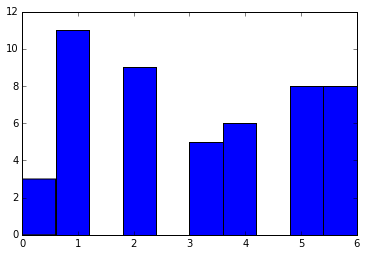

In [90]:
plt.hist(data)

### 3.6 Function application: apply method

Arbitrary functions can be applied along the axes of a DataFrame or Panel using the apply method, which, like the descriptive statistics methods, take an optional axis argument:

In [91]:
df.apply(np.mean, axis=1)

a   -0.100345
b   -0.071851
c   -0.052686
d   -0.887421
dtype: float64

In [92]:
df.apply(lambda x:x.max()-x.min())

One      1.281468
Three    1.963314
Two      1.546997
dtype: float64

In [93]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [94]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [95]:
df.apply(subtract_and_divide,args=(5,),divide=3)

        One     Three       Two
a -1.800774       NaN -1.599456
b -1.831857 -1.820572 -1.419422
c -2.227930 -1.335422 -1.489335
d       NaN -1.989860 -1.935088

In [96]:
df.apply(subtract_and_divide,args=(5,3))

        One     Three       Two
a -1.800774       NaN -1.599456
b -1.831857 -1.820572 -1.419422
c -2.227930 -1.335422 -1.489335
d       NaN -1.989860 -1.935088

In [101]:
df.apply(lambda x: subtract_and_divide(x,5,3))

        One     Three       Two
a -1.800774       NaN -1.599456
b -1.831857 -1.820572 -1.419422
c -2.227930 -1.335422 -1.489335
d       NaN -1.989860 -1.935088

#### Apply elementwise python function: applymap and map

In [103]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [104]:
f=lambda x: len(str(x))

In [106]:
df['One'].map(f)

a    15
b    15
c    14
d     3
Name: One, dtype: int64

In [107]:
df.applymap(f)

   One  Three  Two
a   15      3   14
b   15     15   14
c   14     14   14
d    3     15   15

### 3.7 Reindexing and altering labels

reindex. This accomplishes several things:

    Reorders the existing data to match a new set of labels
    Inserts missing value (NA) markers in label locations where no data for that label existed
    If specified, fill data for missing labels using logic (highly relevant to working with time series data)

In [109]:
s=Series(randn(5),index=['a','b','c','d','e']);s

a   -0.350449
b    0.790331
c    0.344300
d   -0.186831
e   -1.057681
dtype: float64

In [112]:
s1=s.reindex(['e','b','f','d']);s1

e   -1.057681
b    0.790331
f         NaN
d   -0.186831
dtype: float64

In [113]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [115]:
df.reindex(index=['c','f','b'],columns=['Three','Two','One'])

      Three       Two       One
c  0.993735  0.531996 -1.683790
f       NaN       NaN       NaN
b -0.461715  0.741734 -0.495571

In [116]:
df2

    A   B
0   5 NaN
1   2 NaN
2   4   3
3 NaN   4
4   3   6
5   7   8

In [118]:
df1

          A         B         C
0  0.709753 -0.495710 -0.657395
1 -0.293620  1.191711 -2.042215
2 -2.238395  0.346496 -1.090370
3  1.091117  0.150216 -0.176570
4 -0.429886  0.902103 -0.052309

In [121]:
df1.reindex_like(df2) #if the index is shared between objects, 
#"reindex_like" can reindex to align one object with another object

          A         B
0  0.709753 -0.495710
1 -0.293620  1.191711
2 -2.238395  0.346496
3  1.091117  0.150216
4 -0.429886  0.902103
5       NaN       NaN

#### Dropping labels by drop method: drop 
####Renameing/mapping labels by rename method: rename

In [134]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [135]:
df.drop(['a','d'],axis=0)

        One     Three       Two
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996

In [136]:
df.drop(['One'],axis=1)

      Three       Two
a       NaN  0.201633
b -0.461715  0.741734
c  0.993735  0.531996
d -0.969579 -0.805263

If you pass a function, it must return a value when called with any of the labels (and must produce a set of unique values). But if you pass a dict or Series, it need only contain a subset of the labels as keys

In [139]:
s

a    0.623407
b   -0.670169
c    0.437944
d   -1.867359
e   -0.383912
dtype: float64

In [140]:
s.rename(str.upper)

A    0.623407
B   -0.670169
C    0.437944
D   -1.867359
E   -0.383912
dtype: float64

In [138]:
df.rename(columns={'One':'foo','Two':'bar'},
         index={'a':'apple','b':'banana','d':'duria'})

             foo     Three       bar
apple  -0.402323       NaN  0.201633
banana -0.495571 -0.461715  0.741734
c      -1.683790  0.993735  0.531996
duria        NaN -0.969579 -0.805263

### 3.8 Aligning objects with each other: Align

The align method is the fastest way to simultaneously align two objects. It supports a join argument (related to joining and merging):

join='outer': take the union of the indexes (default)
join='left': use the calling object’s index
join='right': use the passed object’s index
join='inner': intersect the indexes

It returns a tuple with both of the reindexed Series:

In [123]:
s = Series(randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [125]:
s1=s[:4];s1

a    0.623407
b   -0.670169
c    0.437944
d   -1.867359
dtype: float64

In [127]:
s2=s[1:];s2

b   -0.670169
c    0.437944
d   -1.867359
e   -0.383912
dtype: float64

In [128]:
s1.align(s2)

(a    0.623407
 b   -0.670169
 c    0.437944
 d   -1.867359
 e         NaN
 dtype: float64, a         NaN
 b   -0.670169
 c    0.437944
 d   -1.867359
 e   -0.383912
 dtype: float64)

In [129]:
s1.align(s2,join='inner')

(b   -0.670169
 c    0.437944
 d   -1.867359
 dtype: float64, b   -0.670169
 c    0.437944
 d   -1.867359
 dtype: float64)

In [133]:
df.align(df2,join='inner')

(Empty DataFrame
 Columns: []
 Index: [], Empty DataFrame
 Columns: []
 Index: [])

### 3.9 Iteration

 iterating over the “keys” of the objects:
    .Series: values
    .DataFrame: column labels
    .Panel: item labels

#### iteritems: iterates through key-value pairs:
    Series: (index, scalar value) pairs
    DataFrame: (column, Series) pairs
    Panel: (item, DataFrame) pairs

In [142]:
for item, frame in wp.iteritems():
    print(item)
    print(frame)

Item1
                   A         B         C         D
2000-01-01  1.298588  0.021211 -1.009933 -0.996367
2000-01-02  0.233841 -1.501125  0.748851 -0.371086
2000-01-03  0.132117 -0.384799  0.490612 -0.781085
2000-01-04 -0.709534 -0.021612 -0.669837  0.417141
2000-01-05 -0.789166  0.056459  0.051781  0.628053
Item2
                   A         B         C         D
2000-01-01 -0.565958  0.611489 -1.096415  0.708189
2000-01-02  0.397582 -0.913530 -1.045918  0.035710
2000-01-03 -1.179924 -1.791222 -1.701906 -1.110841
2000-01-04 -1.275215 -1.089147 -0.460703  2.709785
2000-01-05  0.644086 -0.814950 -1.425363  0.821962


#### iterrows: returns an iterator yielding each index value along with a Series containing the data in each row; this also provide a way to transpose the dataframe

In [143]:
for row_index, row in df2.iterrows():
    print('%s\n%s' % (row_index, row))

0
A     5
B   NaN
Name: 0, dtype: float64
1
A     2
B   NaN
Name: 1, dtype: float64
2
A    4
B    3
Name: 2, dtype: float64
3
A   NaN
B     4
Name: 3, dtype: float64
4
A    3
B    6
Name: 4, dtype: float64
5
A    7
B    8
Name: 5, dtype: float64


In [150]:
df2 = DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]});df2

   x  y
0  1  4
1  2  5
2  3  6

In [152]:
df2_t=DataFrame(dict((idx,values) for idx, values in df2.iterrows()));df2_t

   0  1  2
x  1  2  3
y  4  5  6

In [149]:
df2.T

   0  1  2
x  1  2  3
y  4  5  6

#### itertuples: This method will return an iterator yielding a tuple for each row in the DataFrame. The first element of the tuple will be the row’s corresponding index value, while the remaining values are the row values proper.

In [153]:
for r in df2.itertuples():
    print(r)

(0, 1, 4)
(1, 2, 5)
(2, 3, 6)


### 3.10 Sorting by index and value: Sort and Oder

In [154]:
df

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [155]:
unsorted_df=df.reindex(index=['a','d','c','b']);unsorted_df

        One     Three       Two
a -0.402323       NaN  0.201633
d       NaN -0.969579 -0.805263
c -1.683790  0.993735  0.531996
b -0.495571 -0.461715  0.741734

In [156]:
unsorted_df.sort_index()

        One     Three       Two
a -0.402323       NaN  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d       NaN -0.969579 -0.805263

In [157]:
unsorted_df.sort_index(axis=1)

        One     Three       Two
a -0.402323       NaN  0.201633
d       NaN -0.969579 -0.805263
c -1.683790  0.993735  0.531996
b -0.495571 -0.461715  0.741734

##### DataFrame.sort_index can accept an optional by argument for axis=0

In [159]:
df1 = DataFrame({'one':[2,1,1,1],'two':[1,3,2,4],'three':[5,4,3,2]})

df1.sort_index(by='two')

   one  three  two
0    2      5    1
2    1      3    2
1    1      4    3
3    1      2    4

##### sorting by a multi-index column

In [166]:
df1.columns = MultiIndex.from_tuples([('a','one'),('a','two'),('b','three')])

df1.sort_index(by=('a','two'))

    a         b
  one two three
3   1   2     4
2   1   3     2
1   1   4     3
0   2   5     1

##### sorts by value, with special treatment of NA values via the na_position argument:

In [160]:
s

a    0.623407
b   -0.670169
c    0.437944
d   -1.867359
e   -0.383912
dtype: float64

In [162]:
s[2]=np.nan;s

a    0.623407
b   -0.670169
c         NaN
d   -1.867359
e   -0.383912
dtype: float64

In [164]:
s.order(na_position='first')

c         NaN
d   -1.867359
b   -0.670169
e   -0.383912
a    0.623407
dtype: float64

##### smallest/largest values: nsmallerst and nlargets

In [165]:
s.nsmallest(3)

d   -1.867359
b   -0.670169
e   -0.383912
dtype: float64

### 3.11 dtypes

The main types stored in pandas objects are float, int, bool, datetime64[ns], timedelta[ns], and object. In addition these dtypes have item sizes, e.g. int64 and int32.By default integer types are int64 and float types are float64, REGARDLESS of platform (32-bit or 64-bit). 

#### If a pandas object contains data multiple dtypes IN A SINGLE COLUMN, the dtype of the column will be chosen to accommodate all of the data types (object is the most general)

In [167]:
Series([1, 2, 3, 4, 5, 6.])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: float64

#### upcasting

Types can potentially be upcasted when combined with other types, meaning they are promoted from the current type (say int to float)

In [173]:
df3 = df.reindex_like(df).fillna(value=0.0);df3

        One     Three       Two
a -0.402323  0.000000  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d  0.000000 -0.969579 -0.805263

In [174]:
df3.dtypes

One      float64
Three    float64
Two      float64
dtype: object

#### astype
You can use the astype method to explicitly convert dtypes from one to another

In [175]:
df3

        One     Three       Two
a -0.402323  0.000000  0.201633
b -0.495571 -0.461715  0.741734
c -1.683790  0.993735  0.531996
d  0.000000 -0.969579 -0.805263

In [176]:
df3.dtypes

One      float64
Three    float64
Two      float64
dtype: object

In [182]:
df3.astype('float32').dtypes

One      float32
Three    float32
Two      float32
dtype: object